# Data  <a class="anchor" id="data-overview"></a>
These data have been provided by the Georgia State University and the Learning Agency Lab for the Kaggle competition, “Feedback Prize – Predicting Effective Arguments”, They contain argumentative essays written by U.S. students in grades 6-12. Each essay has been annotated with discourse elements  commonly found in argumentative writing:
- Lead - an introduction that begins with a statistic, a quotation, a description, or some other device to grab the reader’s attention and point toward the thesis
- Position - an opinion or conclusion on the main question
- Claim - a claim that supports the position
- Counterclaim - a claim that refutes another claim or gives an opposing reason to the position
- Rebuttal - a claim that refutes a counterclaim
- Evidence - ideas or examples that support claims, counterclaims, or rebuttals.
- Concluding Statement - a concluding statement that restates the claims

The text classification task is to predict the quality of each discourse within each essay as one of:
- Ineffective
- Adequate
- Effective

The dataset is comprised of training data and example test data.

**Training Data**
The training dataset consists of a .csv file and a directory containing the full-text essays. Note, that parts of the full-text essays are not annotated and are not part of the training.csv file. Annotated discourse elements for each essay, including:     
- discourse_id - ID code for discourse element     
- essay_id - ID code for essay response. This ID code corresponds to the name of the full-text file in the train/ folder.     
- discourse_text - Text of discourse element.     
- discourse_type - Class label of discourse element.     
- discourse_type_num - Enumerated class label of discourse element.   
- discourse_effectiveness - Quality rating of discourse element, the target.      

**Example Test Data**
The example test data consists of:    
- test/ - A folder containing an example essay from the test set. The actual test set comprises about 3,000 essays in a format similar to the training set essays.    
- test.csv - Annotations for the test set essays, containing all of the fields of train.csv except the target, discourse_effectiveness.   
- sample_submission.csv - A sample submission file in the correct format.    

**Table of Contents**
* [Setup](#setup)    
    * [Parameters](#parameters)    
    * [Package Dependency Installation](#installation)    
    * [Package Imports](#packages)     
    * [Module Imports](#modules)  
    * [Configuration](#config)     
* [Data Inspection](#inspect)       
    * [Overview](#overview)     
    * [Cardinality](#cardinality)     
    * [Value Counts](#value_counts)
    * [Null Values](#nulls)     
    * [Memory Size](#memory)  
    * [Alphabetic Characters](#alpha)     
    * [Numeric Characters](#numerics)      
    * [Special Characters](#special)            
    * [Control Characters](#control)    
    * [Punctuation](#punctuation)            
    * [Words](#words)       
    * [Stop Words Ratio](#stopwords)           
    * [Upper Case Words Ratio](#upper)      
    * [Word Length](#word_length)   
    * [Sentences](#sentences)     
    * [Sentence Length](#sentence_length)      
    
        
        

To begin, let's install the dependencies

## Setup <a class="anchor" id="setup"></a>
We'll ensure that all package dependencies are present.

### Parameters <a class="anchor" id="parameters"></a>

In [1]:
NLTK_PUNKT_DIR = '~/nltk_data/tokenizers/punkt'   
NLTK_STOPWORDS_DIR = '~/nltk_data/corpus/stopwords'   
RAW_TRAIN_DISCOURSE = "./data/fpe2022/0_raw/train.csv"
FIG_SIZE = (10,5)
FIG_HEIGHT  = 4
FIG_ASPECT = 3

### Package Dependency Installation <a class="anchor" id="installation"></a>

In [2]:
# Uncomment to install required packages
#%%capture
# !conda install -S -q -c conda-forge -y pandas
# !conda install -S -q -c conda-forge -y matplotlib
# !conda install -S -q -c conda-forge -y numpy
# !conda install -S -q -c conda-forge -y nltk
# !conda install -S -q -c conda-forge -y seaborn
# !conda install -S -q -c conda-forge -y scikit-learn
# !conda install -S -q -c conda-forge -y gensim
# !conda install -S -q -c conda-forge -y pyldavis
# !conda install -S -q -c conda-forge -y wordcloud
# !conda install -S -q -c conda-forge -y textblob
# !conda install -S -q -c conda-forge -y spacy
# !conda install -S -q -c conda-forge -y textstat


### Package Imports <a class="anchor" id="packages"></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import logging.config
import nltk
from IPython.display import display, HTML
# import spacy
# import os
# import unicodedata
# import sklearn as skl
# import gensim
# import pyLDAvis
# import wordcloud
# import textblob
# import textstat

/home/john/anaconda3/envs/fpe/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Module Imports <a class="anchor" id="modules"></a>

In [4]:
# Local Imports 
from fpe.utils.log_config import LOG_CONFIG
from fpe.data.profile import TextProfiler, FeatureExtractor
from fpe.utils.pprint import print_int as pint
from fpe.utils.pprint import print_float as pfloat
%matplotlib inline

### Configurations <a class="anchor" id="config"></a>

In [5]:
# Package specific dependencies
logging.config.dictConfig(LOG_CONFIG)
logger = logging.getLogger(__name__)

# Seaborn
sns.set_palette("Blues_r")
sns.set_style("whitegrid")

# NLTK 
if not os.path.exists(NLTK_PUNKT_DIR):
    nltk.download('punkt')
if not os.path.exists(NLTK_STOPWORDS_DIR):
    nltk.download('stopwords')

# Pandas
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 20)
pd.set_option("display.max_colwidth", 5000)


[nltk_data] Downloading package punkt to /home/john/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

[nltk_data] Downloading package stopwords to /home/john/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Data Inspection <a class="anchor" id="inspect"></a>
Our intent with this inspection of the training set is to get a sense of the features and quality of the data. Here, we examine cardinality, character, word, and sentence counts, special characters, and any aspects having text preprocessing implications. Let's read the data.

In [6]:
fpe = pd.read_csv(RAW_TRAIN_DISCOURSE, encoding='utf-8')


### Overview <a class="anchor" id="overview"></a>
The essential dataset is the train.csv file, containing discourse and essay identifiers, the discourse text, the discourse type, and finally the rating.

In [7]:
fpe.head()

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness
0,0013cc385424,007ACE74B050,"Hi, i'm Isaac, i'm going to be writing about how this face on Mars is a natural landform or if there is life on Mars that made it. The story is about how NASA took a picture of Mars and a face was seen on the planet. NASA doesn't know if the landform was created by life on Mars, or if it is just a natural landform.",Lead,Adequate
1,9704a709b505,007ACE74B050,"On my perspective, I think that the face is a natural landform because I dont think that there is any life on Mars. In these next few paragraphs, I'll be talking about how I think that is is a natural landform",Position,Adequate
2,c22adee811b6,007ACE74B050,I think that the face is a natural landform because there is no life on Mars that we have descovered yet,Claim,Adequate
3,a10d361e54e4,007ACE74B050,"If life was on Mars, we would know by now. The reason why I think it is a natural landform because, nobody live on Mars in order to create the figure. It says in paragraph 9, ""It's not easy to target Cydonia,"" in which he is saying that its not easy to know if it is a natural landform at this point. In all that they're saying, its probably a natural landform.",Evidence,Adequate
4,db3e453ec4e2,007ACE74B050,People thought that the face was formed by alieans because they thought that there was life on Mars.,Counterclaim,Adequate


### Cardinality <a class="anchor" id="cardinality"></a>
Let's check the cardinality of discourses, essays, texts, types, and effectiveness ratings. From this point forward, we'll use our TextProfiler object to extract features from the data.

In [8]:
profiler = TextProfiler(data=fpe, text_col='discourse_text')
profiler.cardinality

,Cardinality
discourse_id,36765
essay_id,4191
discourse_text,36691
discourse_type,7
discourse_effectiveness,3


It seems we have some duplication in discourse text as we have 74 fewer unique essays than discourse identifiers. Let's examine this a bit closer.

In [9]:
profiler.duplicate_text['stats']
profiler.duplicate_text['data']


,Num Duplicates,Pct Duplicates
Column,,
discourse_text,119,0.32


296      The use of the Facial Action Coding System to read the emotional expressions of students in a classroom is valuable 
370                                                                               Summer projects should be teacher-designed 
1009                                                                              Summer projects should be teacher-designed 
1552                                                                              Summer projects should be teacher-designed 
1667                                                                              Summer projects should be student-designed 
                                                                 ...                                                         
35488                                                                                                   you can help others. 
35493                                                                                                   you can help o

We have over one hundred duplicates, counting all records that are duplicate. A small proportion; yet, we'll need to deal with these duplicates during the preprocessing stage.

### Value Counts <a class="anchor" id="value_counts"></a>
Here we examine the distribution of discourse types and effectiveness ratings.

#### Discourse Types

,discourse_type_count,discourse_type_ratio
Evidence,12105,0.33
Claim,11977,0.33
Position,4024,0.11
Concluding Statement,3351,0.09
Lead,2291,0.06
Counterclaim,1773,0.05
Rebuttal,1244,0.03


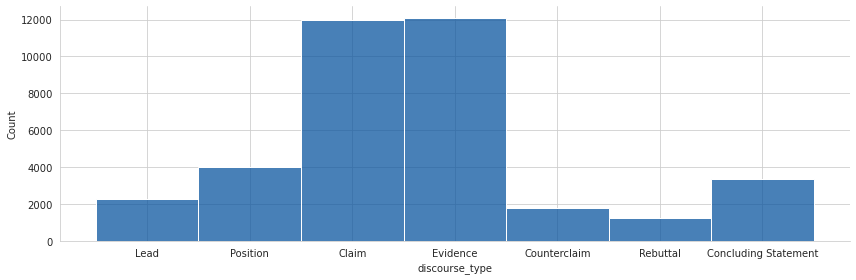

In [10]:
fig = sns.displot(fpe['discourse_type'], height=FIG_HEIGHT, aspect=FIG_ASPECT)
profiler.value_counts(col='discourse_type')


About 2/3rd of the essays contain claim and evidence discourse types. The fact that 89% of the argument papers fail to state a position (according to annotators) raises quality of education issues, but that's a topic for another paper.

#### Effectiveness Ratings 

,discourse_effectiveness_count,discourse_effectiveness_ratio
Adequate,20977,0.57
Effective,9326,0.25
Ineffective,6462,0.18


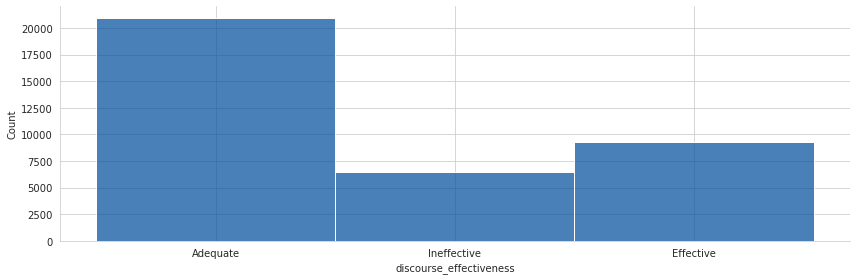

In [11]:
fig = sns.displot(fpe['discourse_effectiveness'], height=FIG_HEIGHT, aspect=FIG_ASPECT)
profiler.value_counts(col='discourse_effectiveness')

Well, in Lake Wobegon, all the children are above average.

### Null Values <a class="anchor" id="nulls"></a>

In [12]:
fpe.isnull().sum()

discourse_id               0
essay_id                   0
discourse_text             0
discourse_type             0
discourse_effectiveness    0
dtype: int64

### Memory Size <a class="anchor" id="memory"></a>

In [13]:
profiler.memory

,Column,Memory (Bytes)
0,discourse_id,"2,536,785"
1,essay_id,"2,536,785"
2,discourse_text,"12,537,564"
3,discourse_type,"2,391,934"
4,discourse_effectiveness,"2,418,437"
6,Total,"22,421,505"


### Alphabetic Characters <a class="anchor" id="alpha"></a>

In [14]:
fe = FeatureExtractor(data=fpe)
fe.feature = 'alpha'

print("The dataset contains {} alphabetic characters".format(pint(fe.total)))
display(HTML("<h3>The descriptive statistics of alphabetic characters per discourse</h3>"))
fe.statistics

The dataset contains 7,319,371 alphabetic characters


,count,mean,std,min,25%,50%,75%,max
alpha,"36,765.00",199.09,209.69,3.00,70.00,124.00,251.00,"3,217.00"


The median is actually 124 characters per discourse as the mean has been influenced by the overachiever with over 3000 characters.

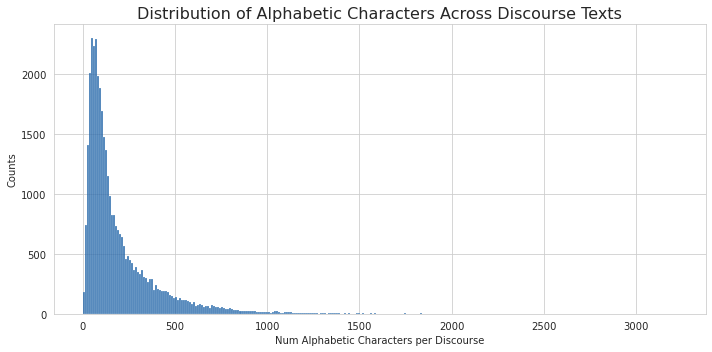

In [15]:
fig = plt.figure(figsize=FIG_SIZE, tight_layout=True)
title = "Distribution of Alphabetic Characters Across Discourse Texts"
xlab = "Num Alphabetic Characters per Discourse"
ylab = "Counts"
fig = fe.plot(fig=fig,title=title, xlab=xlab,ylab=ylab)

In [16]:
display(HTML("<h3>Random Selection with Number of Alphabetic Characters</h3>"))
fe.random_discourse


,14486
discourse_id,09e4be395f19
essay_id,0202B3446E2E
discourse_text,"it is obsurd that in Wyoming, a state of 500,000 voters, only get 55 represenntitives. It is with great agrivation that i ask you to make this change."
discourse_type,Evidence
discourse_effectiveness,Ineffective
alpha,110


### Numeric Characters <a class="anchor" id="numerics"></a>

In [17]:
fe.feature = 'numerics'
print("There are {} numerics in the corpus.".format(pint(fe.total)))
display(HTML("<h3>The descriptive statistics of numeric characters per discourse</h3>"))
fe.statistics

There are 5,038 numerics in the corpus.


,count,mean,std,min,25%,50%,75%,max
numeric,"36,765.00",0.14,0.57,0.00,0.00,0.00,0.00,13.00


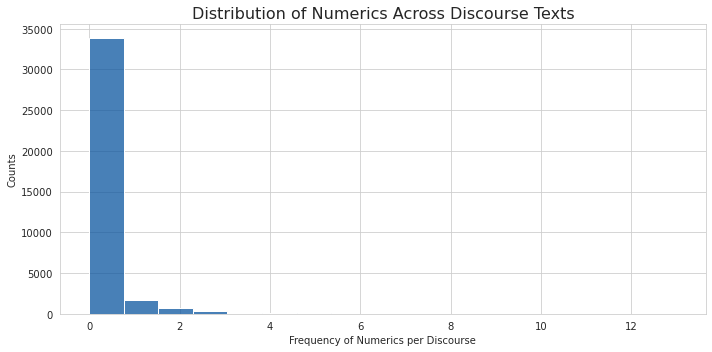

In [18]:
fig = plt.figure(figsize=FIG_SIZE, tight_layout=True)
title = "Distribution of Numerics Across Discourse Texts"
xlab = "Frequency of Numerics per Discourse"
ylab = "Counts"
fig = fe.plot(fig=fig,title=title, xlab=xlab,ylab=ylab)

In [19]:
display(HTML("<h3>Random Selection with Number of Digits</h3>"))
fe.random_discourse


,8857
discourse_id,97f2f76f94a3
essay_id,9FAA72C47BB0
discourse_text,"In Paragraph 3 the text states that process begins with 3-D computer model of the face, all 44 major muscles in the model must move like a human."
discourse_type,Evidence
discourse_effectiveness,Adequate
numeric,2


### Special Characters (Non-Punctuation) <a class="anchor" id="special"></a>
Here we examine the special characters that are not one of the 14 punctuation characters.

In [20]:
fe.feature = 'special_characters'
print("The dataset contains {} special characters".format(pint(fe.total)))
display(HTML("<h3>The descriptive statistics of special characters per discourse</h3>"))
fe.statistics

The dataset contains 1,977 special characters


,count,mean,std,min,25%,50%,75%,max
special_characters,"36,765.00",0.05,0.43,0.00,0.00,0.00,0.00,33.00


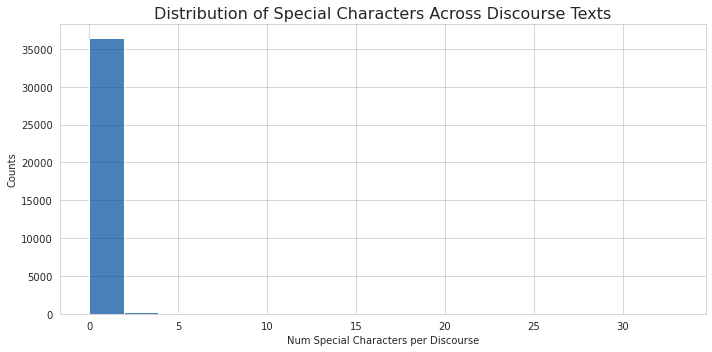

In [21]:
fig = plt.figure(figsize=FIG_SIZE, tight_layout=True)
title = "Distribution of Special Characters Across Discourse Texts"
xlab = "Num Special Characters per Discourse"
ylab = "Counts"
fig = fe.plot(fig=fig,title=title, xlab=xlab,ylab=ylab)

In [22]:

extractor = fe.get_extractor()
print("The five most frequent special characters")
extractor.counts[0:5]

The five most frequent special characters


,Count
underscore,739
forward_slash,477
percent,423
dollar,124
ampersand,75


In [23]:
display(HTML("<h3>Random Selection with Number of Special Characters</h3>"))
fe.random_discourse

,13816
discourse_id,79d4ab8ddda8
essay_id,F7561C027920
discourse_text,"More than likely, they would research more about certain skills or information in order to make their projects even better and stand out from their peers. Subjects such as science and english are definitely able to make this happen because the skills and techniques that are learned can always be worked on, and they are easier for students to share what they know about certain topics. For example, AP chemistry has everyone doing the same assignment before the school year starts. Students in AP Chemistry, instead, could create their own experiments with the skills and knowledge acquired from Research Chemistry. The students would not only keep the techniques/skills practiced and knowledge from the year before, but also have the opportunity to explore different skills or use the skills obtained at a more advanced level. Even though students wouldn't lose the skills and knowledge learned from previous classes, they would also learn and build on some others skills such as life skills."
discourse_type,Evidence
discourse_effectiveness,Effective
special_characters,1


### Control Characters <a class="anchor" id="control"></a>
Here we examine the special characters that are not one of the 14 punctuation characters.

In [24]:
fe.feature = 'control_characters'
print("The dataset contains {} control characters".format(pint(fe.total)))
display(HTML("<h3>The descriptive statistics of control characters per discourse</h3>"))
fe.statistics

The dataset contains 8,985 control characters


,count,mean,std,min,25%,50%,75%,max
control,"36,765.00",0.24,1.19,0.00,0.00,0.00,0.00,44.00


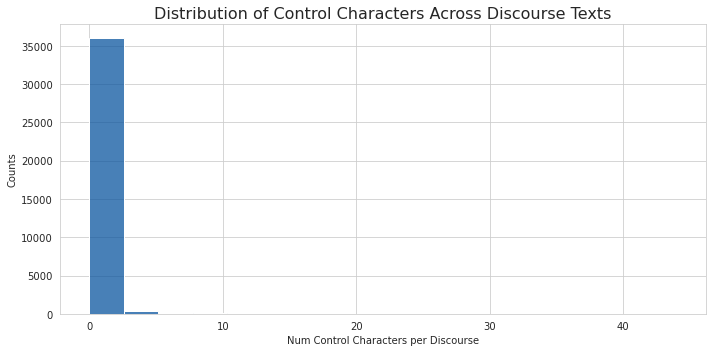

In [25]:
fig = plt.figure(figsize=FIG_SIZE, tight_layout=True)
title = "Distribution of Control Characters Across Discourse Texts"
xlab = "Num Control Characters per Discourse"
ylab = "Counts"
fig = fe.plot(fig=fig,title=title, xlab=xlab,ylab=ylab)

In [26]:
display(HTML("<h3>Random Selection with Number of Control Characters</h3>"))
fe.random_discourse

,25550
discourse_id,4870eb194cfb
essay_id,961D937626F7
discourse_text,"The voting system should be done like specificly, because if you setup different things it's not going to work at all. It depends what kind of setups you are making. But I think it's not the good way to make voting system in setups. \n"
discourse_type,Claim
discourse_effectiveness,Ineffective
control,1


### Punctuation <a class="anchor" id="punctuation"></a>

In [27]:
fe.feature = 'punctuation'
print("The dataset contains {} punctuation marks".format(pint(fe.total)))
display(HTML("<h3>The descriptive statistics of punctuation marks per discourse</h3>"))
fe.statistics

The dataset contains 212,787 punctuation marks


,count,mean,std,min,25%,50%,75%,max
punctuation,"36,765.00",5.79,7.94,0.00,1.00,3.00,8.00,169.00


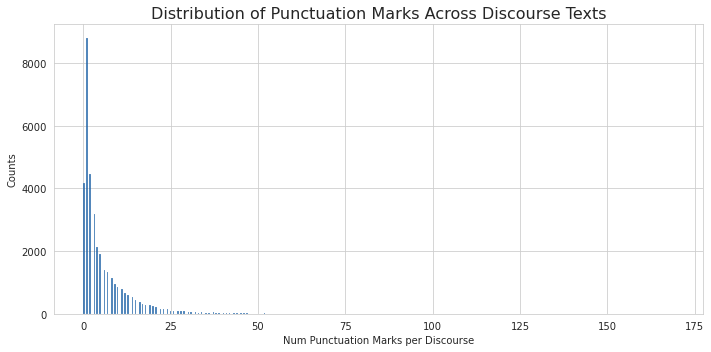

In [28]:
fig = plt.figure(figsize=FIG_SIZE, tight_layout=True)
title = "Distribution of Punctuation Marks Across Discourse Texts"
xlab = "Num Punctuation Marks per Discourse"
ylab = "Counts"
fig = fe.plot(fig=fig,title=title, xlab=xlab,ylab=ylab)

In [29]:

extractor = fe.get_extractor()
print("The five most frequent punctuation marks")
extractor.counts[0:5]

The five most frequent punctuation marks


,Count
period,74207
comma,51960
elipses,46485
apostrophe,16908
quotation mark,10307


In [30]:
display(HTML("<h3>Random Selection with Number of Punctuation Marks</h3>"))
fe.random_discourse

,23387
discourse_id,9ece01ae9c08
essay_id,76D57BCC7A10
discourse_text,"not the people that work as hard as they possibly can all day and barley have their eight hours of rest shouldn't be doing it the ""other guys should""."
discourse_type,Rebuttal
discourse_effectiveness,Adequate
punctuation,4


### Words <a class="anchor" id="words"></a>

In [31]:
fe.feature = 'words'
print("The dataset contains {} words".format(pint(fe.total)))
display(HTML("<h3>The descriptive statistics of words per discourse</h3>"))
fe.statistics

The dataset contains 1,680,956 words


,count,mean,std,min,25%,50%,75%,max
words,"36,765.00",45.72,46.64,2.00,17.00,29.00,58.00,831.00


The average word count per discourse is approximately 45 words, yet the standard deviation and range indicate considerable variation in words per discourse texts. 

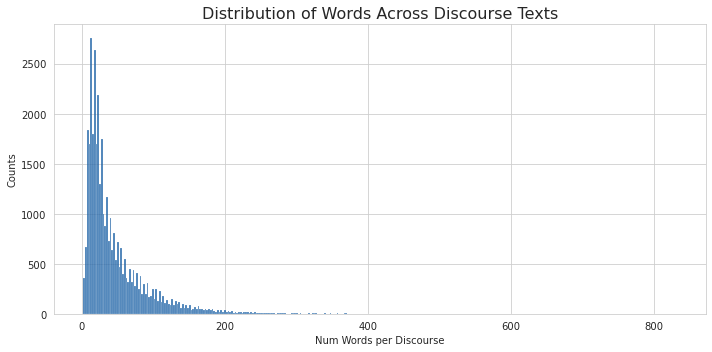

In [32]:
fig = plt.figure(figsize=FIG_SIZE, tight_layout=True)
title = "Distribution of Words Across Discourse Texts"
xlab = "Num Words per Discourse"
ylab = "Counts"
fig = fe.plot(fig=fig,title=title, xlab=xlab,ylab=ylab)

In [33]:
display(HTML("<h3>Random Selection with Number of Words</h3>"))
fe.random_discourse

,2245
discourse_id,219897bb3d97
essay_id,291AAEA628E1
discourse_text,"Now people know that venus is not fit for life forms now. Even people who have gotten close anough to venus couldnt get even close to study the surface of venus. They dont get a whole lot of time to look at venus because of its light and how bright it is, if people attempted to take a photo of venus it would not come out how they wanted. They only way we get any idea of venus and its surface is from the human eye. We are never able to get close anough for samples because we would need to get extremely close and we cant because of its heat, gases. Venus could easily burn through most metals from earth, but astronomers think using old technology or a mechanical computer could help figure out more on venus. The mechanical computer actually doesnt involve electronical equipment. Thats how the parts to the mechanical computer is made, is by heat, pressure and other types of forces"
discourse_type,Evidence
discourse_effectiveness,Ineffective
words,166


### Word Length <a class="anchor" id="word_length"></a>

In [34]:
fe.feature = 'word_length'
print("The average word length across the corpus is {} characters".format(pint(fe.total)))
display(HTML("<h3>The descriptive statistics of average word length per discourse</h3>"))
fe.statistics

The average word length across the corpus is 170,135.40065808917 characters


,count,mean,std,min,25%,50%,75%,max
word_length,"36,765.00",4.63,0.69,2.17,4.20,4.56,4.96,19.00


The inter-quartile range of vocabulary is [16,46], a reasonably wide range. In the exploratory data analysis, we'll examine the relationships between vocabulary and performance rating. Meanwhile, let's evaluate sentence characteristics.

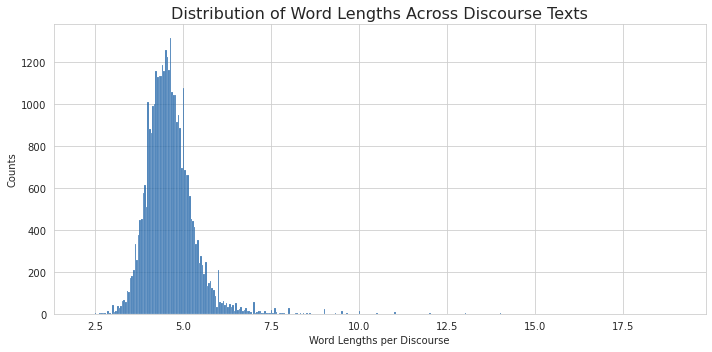

In [35]:
fig = plt.figure(figsize=FIG_SIZE, tight_layout=True)
title = "Distribution of Word Lengths Across Discourse Texts"
xlab = "Word Lengths per Discourse"
ylab = "Counts"
fig = fe.plot(fig=fig,title=title, xlab=xlab,ylab=ylab)

In [36]:
display(HTML("<h3>Random Selection with Average Word Length</h3>"))
fe.random_discourse

,27037
discourse_id,d5478a9e80a6
essay_id,A98E8EFFC8A9
discourse_text,"For everyone else around a driverless car, would always be in great danger."
discourse_type,Claim
discourse_effectiveness,Adequate
word_length,4.85


### Upper Case Words <a class="anchor" id="word_length"></a>
Words in upper case typically imply emphasis or emotion. 

In [37]:
fe.feature = 'upper_case'
display(HTML("<h3>The descriptive statistics of upper case word ratios per discourse</h3>"))
fe.statistics

,count,mean,std,min,25%,50%,75%,max
upper_case,"36,765.00",0.01,0.04,0.00,0.00,0.00,0.00,1.00


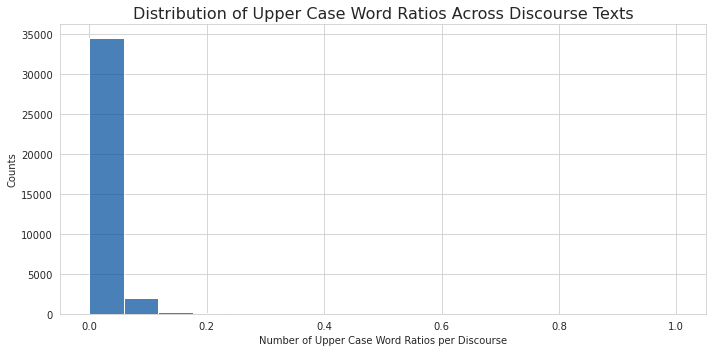

In [38]:
fig = plt.figure(figsize=FIG_SIZE, tight_layout=True)
title = "Distribution of Upper Case Word Ratios Across Discourse Texts"
xlab = "Number of Upper Case Word Ratios per Discourse"
ylab = "Counts"
fig = fe.plot(fig=fig,title=title, xlab=xlab,ylab=ylab)

I'd like to read the argument with 297 upper case words! Actually, let's take a look.

In [39]:
display(HTML("<h3>Observation with Maximum Upper Case Word Ratio</h3>"))
fe.features[fe.features['upper_case'] == 1]['discourse_text'].values[0]

'CAUSE I THINK THAT STUDENTS SHOULD GET TOGETHER IN HELP OUR SCHOOL BY DOING WORK. '

### Stop Words Ratio <a class="anchor" id="stopwords"></a>

In [40]:
fe.feature = 'stopwords'
print("The descriptive statistics of stop words ratio per discourse")
fe.statistics

The descriptive statistics of stop words ratio per discourse


,count,mean,std,min,25%,50%,75%,max
stopwords,"36,765.00",0.45,0.10,0.00,0.40,0.45,0.51,1.00


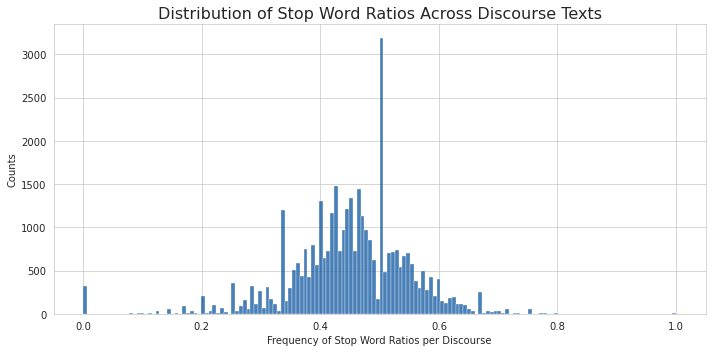

In [41]:
fig = plt.figure(figsize=FIG_SIZE, tight_layout=True)
title = "Distribution of Stop Word Ratios Across Discourse Texts"
xlab = "Frequency of Stop Word Ratios per Discourse"
ylab = "Counts"
fig = fe.plot(fig=fig,title=title, xlab=xlab,ylab=ylab)

In [42]:
display(HTML("<h3>Random Selection with Stop Word Ratio</h3>"))
fe.random_discourse

,22829
discourse_id,dacfd26ddd26
essay_id,7203112033A1
discourse_text,"3 OPINION: Why not just try it. I think you guys or girls, or whatever should give it a try because not everyone has the privilege to have sort of secondary learning challenge"
discourse_type,Claim
discourse_effectiveness,Adequate
stopwords,0.45


### Sentences <a class="anchor" id="sentences"></a>

In [43]:
fe.feature = 'sentences'
print("There are {} sentences in the corpus.".format(pint(fe.total)))
print("The descriptive statistics of sentence counts per discourse")
fe.statistics

There are 84,112 sentences in the corpus.
The descriptive statistics of sentence counts per discourse


,count,mean,std,min,25%,50%,75%,max
sentences,"36,765.00",2.29,2.25,1.00,1.00,1.00,3.00,41.00


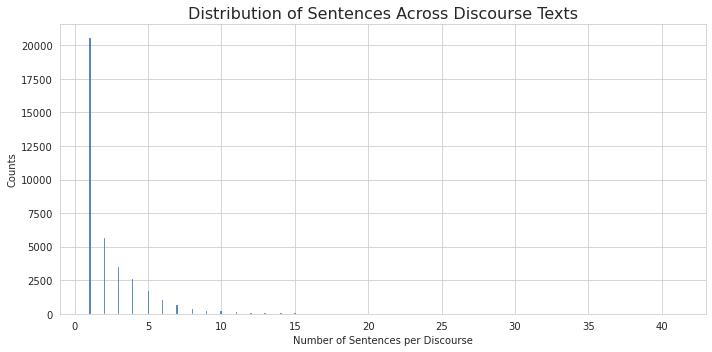

In [44]:
fig = plt.figure(figsize=FIG_SIZE, tight_layout=True)
title = "Distribution of Sentences Across Discourse Texts"
xlab = "Number of Sentences per Discourse"
ylab = "Counts"
fig = fe.plot(fig=fig,title=title, xlab=xlab,ylab=ylab)

In [45]:
display(HTML("<h3>Random Selection with Number of Sentences</h3>"))
fe.random_discourse

,5085
discourse_id,7dff03b6689e
essay_id,5C01C98F3655
discourse_text,We cattle boat sailers don't give up we are resilient. I bet you are resilient to so sign up. You get to travel get to see some places you never seen before. Sometimes you might even go on a avanture. If you dont believe me you can scrutinize this sign up sheet. The ocean wheather can get surreal but we cattle boat sailers dont give up! You get to see China you'll see Europe. While your traveling you get to haul horses and cattle. The horses will have enough food to last for the trip the record for the most trips is nine trips aint that crazy. Well if you sign up today you might be the one to beat that record so get started by signing up right now for free today.
discourse_type,Evidence
discourse_effectiveness,Adequate
sentences,10


### Sentence Length <a class="anchor" id="sentence_length"></a>

In [46]:
fe.feature = 'sentence_length'
print("There average sentence length per discourse is {}.".format(pint(fe.total)))
print("The descriptive statistics of sentence length")
fe.statistics

There average sentence length per discourse is 723,741.4148596779.
The descriptive statistics of sentence length


,count,mean,std,min,25%,50%,75%,max
sentence_length,"36,765.00",19.69,11.71,1.00,13.00,18.00,24.00,693.00


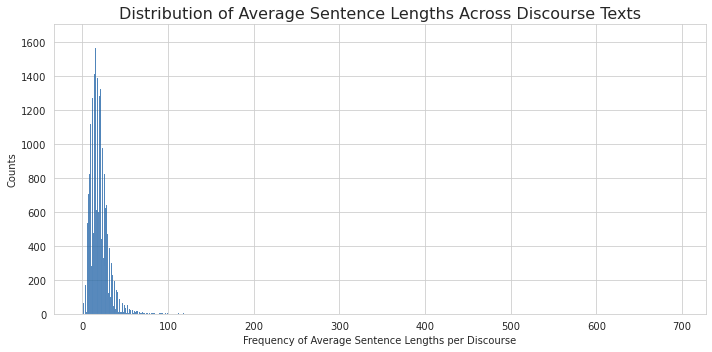

In [47]:
fig = plt.figure(figsize=FIG_SIZE, tight_layout=True)
title = "Distribution of Average Sentence Lengths Across Discourse Texts"
xlab = "Frequency of Average Sentence Lengths per Discourse"
ylab = "Counts"
fig = fe.plot(fig=fig,title=title, xlab=xlab,ylab=ylab)

In [48]:
display(HTML("<h3>Random Selection with Average Sentence Lengths</h3>"))
fe.random_discourse

,12482
discourse_id,cb93180d0b69
essay_id,E1BFD7E344FA
discourse_text,The last reason is how can we make it better.
discourse_type,Claim
discourse_effectiveness,Ineffective
sentence_length,10.00
